Job Status: job has successfully run
Resulting counts: {'11': 1000}


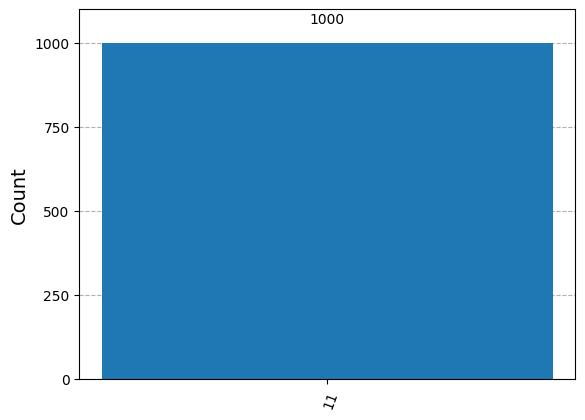

In [2]:
	import qiskit
	from qiskit import QuantumCircuit
	from qiskit_aer import Aer
	from qiskit_ibm_provider.job import job_monitor
	from qiskit.visualization import plot_histogram
	
	# Create a quantum circuit with 2 qubits
	qc = QuantumCircuit(2)
	
	# Initialize qubit 0 to |1> and qubit 1 to |0>
	# Qubit 1 is already |0> by default, so we don't need to do anything to it.
	# We'll set qubit 0 to |1> by applying X gate.
	qc.x(0)  
	
	# To copy the state of qubit 0 to qubit 1, CNOT is used
	qc.cx(0, 1)  
	
	# Measure the qubits to see the result
	qc.measure_all()
	
	# Execute the circuit on the qasm simulator
	simulator = Aer.get_backend('qasm_simulator')
	transpiled_circuit = qiskit.transpile(qc, simulator)
	job = simulator.run(transpiled_circuit, shots=1000)
	job_monitor(job)
	result = job.result()
	counts = result.get_counts(qc)
	
	# Display the result
	print("Resulting counts:", counts)
	plot_histogram(counts)		